# Import necessary libraries to GET economic indicators from FRED

Additionally, determine frequency of the data, and remove invalid NaN entries

In [1]:
from fredapi import Fred
from pathlib import Path
import pandas as pd

api_string = Path('fred_api_key.txt').read_text()
fred = Fred(api_key=api_string)


## 1.) Get GDP_Data

In [2]:

gdp_data = fred.get_series('GDP')

In [3]:
gdp_data.tail()

2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25723.941
2022-10-01    26137.992
2023-01-01    26529.774
dtype: float64

In [4]:
gdp_data.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [5]:
gdp_data = gdp_data.to_frame().reset_index()
gdp_data.rename(columns = {'index': 'Date', 0: 'GDP'},
                             inplace = True)
gdp_data

,Date,GDP
0,1946-01-01,NaN
1,1946-04-01,NaN
2,1946-07-01,NaN
3,1946-10-01,NaN
4,1947-01-01,243.164
...,...,...
304,2022-01-01,24740.480
305,2022-04-01,25248.476
306,2022-07-01,25723.941
307,2022-10-01,26137.992


In [6]:
gdp_data.dropna(subset=['GDP'], inplace=True)
gdp_data

,Date,GDP
4,1947-01-01,243.164
5,1947-04-01,245.968
6,1947-07-01,249.585
7,1947-10-01,259.745
8,1948-01-01,265.742
...,...,...
304,2022-01-01,24740.480
305,2022-04-01,25248.476
306,2022-07-01,25723.941
307,2022-10-01,26137.992


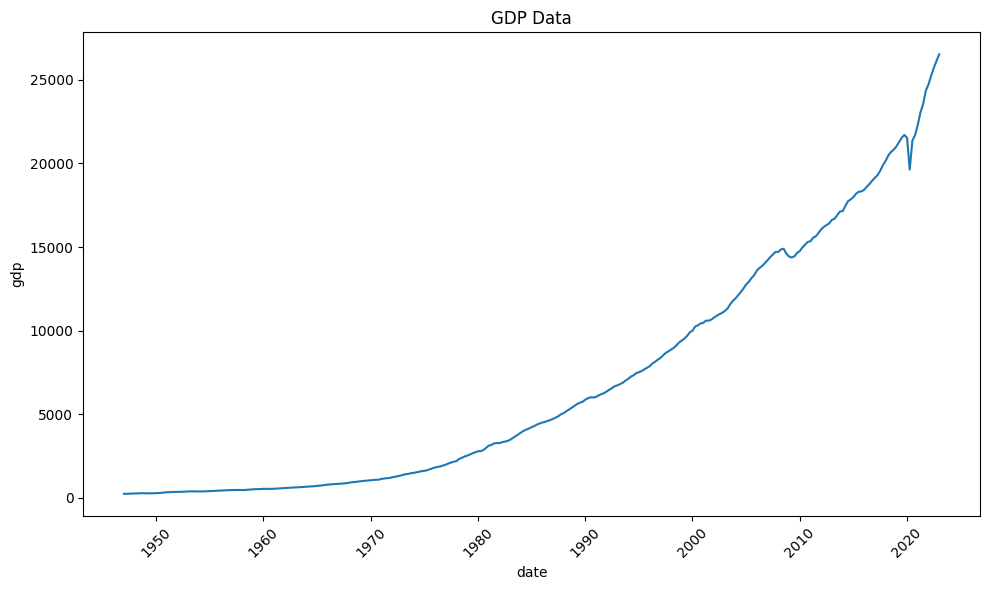

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gdp_data['Date'], gdp_data['GDP'])
plt.xlabel('date')
plt.ylabel('gdp')
plt.title('GDP Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
gdp_data.to_csv('data/gdp_data.csv', index=False)

## 2.) Get Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

In [9]:
fred.search('CPIAUCSL')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-07-24,2023-07-24,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-06-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-07-12 07:41:01-05:00,93,The Consumer Price Index for All Urban Consume...
RRSFS,RRSFS,2023-07-24,2023-07-24,Advance Real Retail and Food Services Sales,1992-01-01,2023-06-01,Monthly,M,Millions of 1982-84 CPI Adjusted Dollars,Mil. of 1982-84 CPI Adjusted $,Seasonally Adjusted,SA,2023-07-18 07:39:01-05:00,64,The data in this series are calculated using t...
AMBSLREAL,AMBSLREAL,2023-07-24,2023-07-24,Real St. Louis Adjusted Monetary Base (DISCONT...,1947-01-01,2019-11-01,Monthly,M,Billions of 1982-84 Dollars,Bil. of 1982-84 $,Seasonally Adjusted,SA,2020-03-11 13:03:01-05:00,2,This series deflates St. Louis Adjusted Moneta...
MZMREAL,MZMREAL,2023-07-24,2023-07-24,Real MZM Money Stock (DISCONTINUED),1959-01-01,2021-01-01,Monthly,M,Billions of 1982-84 Dollars,Bil. of 1982-84 $,Seasonally Adjusted,SA,2023-06-13 10:08:01-05:00,1,This series has been discontinued and will no ...


In [10]:
cpi_data = fred.get_series('CPIAUCSL')
print(cpi_data.head())
print(cpi_data.tail())
print(cpi_data.describe())


1947-01-01    21.48
1947-02-01    21.62
1947-03-01    22.00
1947-04-01    22.00
1947-05-01    21.95
dtype: float64
2023-02-01    301.648
2023-03-01    301.808
2023-04-01    302.918
2023-05-01    303.294
2023-06-01    303.841
dtype: float64
count    918.000000
mean     117.794828
std       83.736360
min       21.480000
25%       32.105000
50%      106.900000
75%      188.000000
max      303.841000
dtype: float64


In [11]:
cpi_data = cpi_data.to_frame().reset_index()
cpi_data.rename(columns = {'index': 'Date', 0: 'cpi'},
                             inplace = True)
cpi_data


,Date,cpi
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


In [12]:
cpi_data.dropna(subset=['cpi'], inplace=True)
cpi_data

,Date,cpi
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


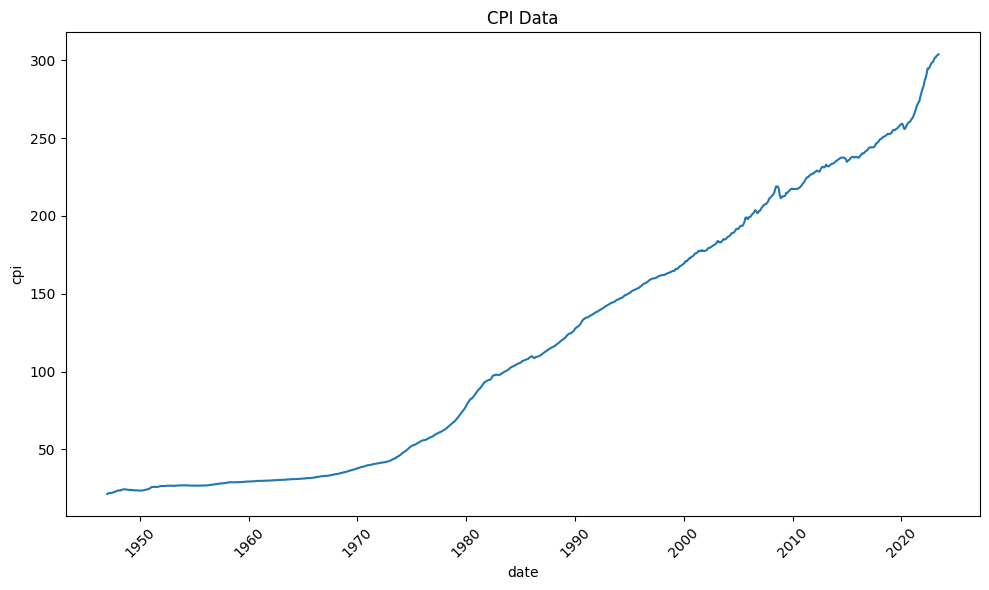

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(cpi_data['Date'], cpi_data['cpi'])
plt.xlabel('date')
plt.ylabel('cpi')
plt.title('CPI Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
cpi_data.to_csv('data/cpi_data.csv', index=False)

## 3.) Get Umemployement rate (UNRATE)

In ALFRED there is the concept of a vintage date. Basically every observation can have three dates associated with it: date, realtime_start and realtime_end.

date: the date the value is for

realtime_start: the first date the value is valid

realitime_end: the last date the value is valid

In [15]:
unemp_data = fred.get_series('UNRATE')

In [16]:
unemp_data.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

In [17]:
unemp_data.tail()

2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
dtype: float64

In [18]:
unemp_data = unemp_data.to_frame().reset_index()
unemp_data.rename(columns = {'index': 'Date', 0: 'unemp_rate'},
                             inplace = True)
unemp_data

,Date,unemp_rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
901,2023-02-01,3.6
902,2023-03-01,3.5
903,2023-04-01,3.4
904,2023-05-01,3.7


In [19]:
unemp_data.dropna(subset=['unemp_rate'], inplace=True)
unemp_data

,Date,unemp_rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
901,2023-02-01,3.6
902,2023-03-01,3.5
903,2023-04-01,3.4
904,2023-05-01,3.7


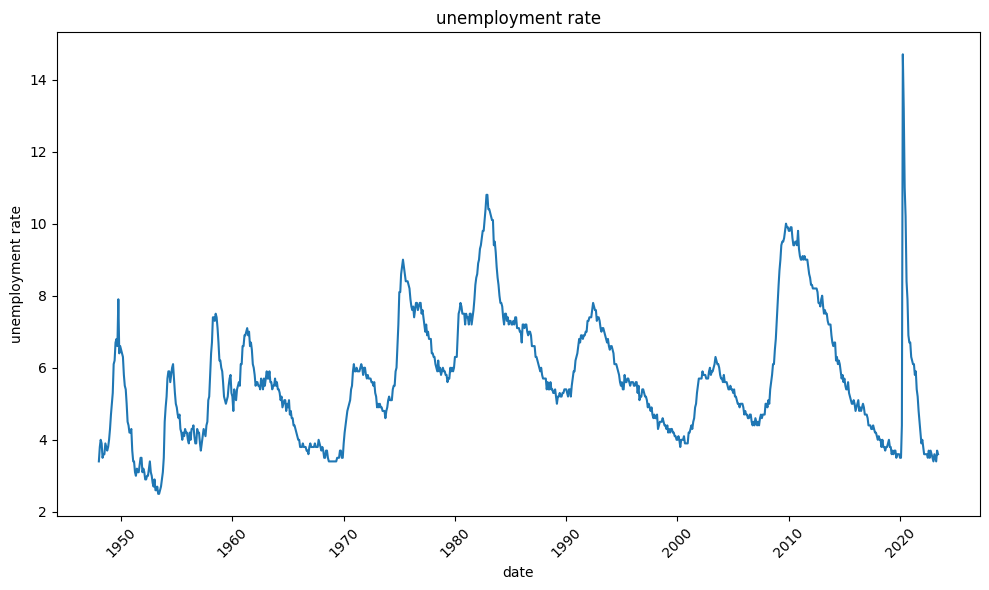

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(unemp_data['Date'], unemp_data['unemp_rate'])
plt.xlabel('date')
plt.ylabel('unemployment rate')
plt.title('unemployment rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
unemp_data.to_csv('data/unemp_data.csv', index=False)

## 4.) Get Manufacturers' New Orders: Total Manufacturing (AMTMNO)	

In [22]:
mno_data = fred.get_series('AMTMNO')
mno_data.head()

1992-02-01    223500.0
1992-03-01    233732.0
1992-04-01    238173.0
1992-05-01    241916.0
1992-06-01    240660.0
dtype: float64

In [23]:
mno_data = mno_data.to_frame().reset_index()
mno_data.rename(columns = {'index': 'Date', 0: 'manuNewOrders'},
                             inplace = True)
mno_data


,Date,manuNewOrders
0,1992-02-01,223500.0
1,1992-03-01,233732.0
2,1992-04-01,238173.0
3,1992-05-01,241916.0
4,1992-06-01,240660.0
...,...,...
371,2023-01-01,581049.0
372,2023-02-01,571265.0
373,2023-03-01,574915.0
374,2023-04-01,576416.0


In [24]:
mno_data.dropna(inplace=True)
mno_data

,Date,manuNewOrders
0,1992-02-01,223500.0
1,1992-03-01,233732.0
2,1992-04-01,238173.0
3,1992-05-01,241916.0
4,1992-06-01,240660.0
...,...,...
371,2023-01-01,581049.0
372,2023-02-01,571265.0
373,2023-03-01,574915.0
374,2023-04-01,576416.0


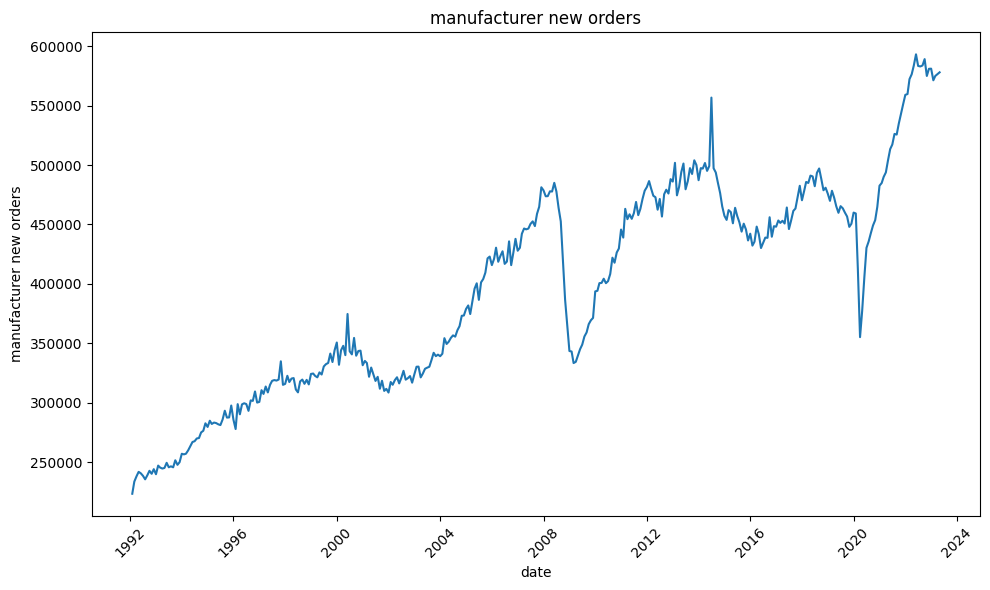

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(mno_data['Date'], mno_data['manuNewOrders'])
plt.xlabel('date')
plt.ylabel('manufacturer new orders')
plt.title('manufacturer new orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
mno_data.to_csv('data/mno_data.csv', index=False)

## 5.) Global price of WTI Crude (POILWTIUSDM)	


In [27]:
oil_prices = fred.get_series('POILWTIUSDM')
oil_prices.head()

1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
dtype: float64

In [28]:
oil_prices = oil_prices.to_frame().reset_index()
oil_prices.rename(columns = {'index': 'Date', 0: 'oilPrice'},
                             inplace = True)
oil_prices

,Date,oilPrice
0,1980-01-01,NaN
1,1980-02-01,NaN
2,1980-03-01,NaN
3,1980-04-01,NaN
4,1980-05-01,NaN
...,...,...
516,2023-01-01,78.251364
517,2023-02-01,77.027500
518,2023-03-01,73.348261
519,2023-04-01,79.126500


In [29]:
oil_prices.dropna(inplace=True)
oil_prices

,Date,oilPrice
120,1990-01-01,22.604348
121,1990-02-01,22.202500
122,1990-03-01,20.440455
123,1990-04-01,18.526667
124,1990-05-01,18.443043
...,...,...
516,2023-01-01,78.251364
517,2023-02-01,77.027500
518,2023-03-01,73.348261
519,2023-04-01,79.126500


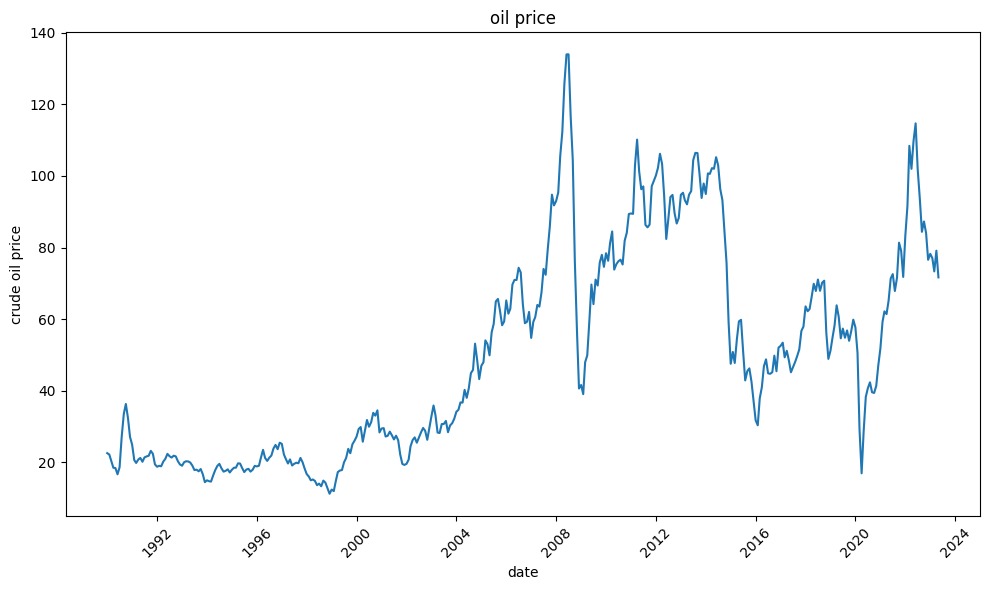

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(oil_prices['Date'], oil_prices['oilPrice'])
plt.xlabel('date')
plt.ylabel('crude oil price')
plt.title('oil price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
oil_prices.to_csv('data/oil_prices.csv', index=False)

## 6.) Get Moody's Seasoned Aaa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity (AAA10Y)





In [32]:
aaaCorp_vs_treasury10 = fred.get_series('AAA10Y')
print(aaaCorp_vs_treasury10.head())
print(aaaCorp_vs_treasury10.tail())

1983-01-03    1.45
1983-01-04    1.42
1983-01-05    1.44
1983-01-06    1.35
1983-01-07    1.38
dtype: float64
2023-07-14    0.80
2023-07-17    0.81
2023-07-18    0.81
2023-07-19    0.78
2023-07-20    0.77
dtype: float64


In [33]:
print(type(aaaCorp_vs_treasury10))

<class 'pandas.core.series.Series'>


In [34]:
aaaCorp_vs_treasury10 = aaaCorp_vs_treasury10.to_frame().reset_index()

In [35]:
aaaCorp_vs_treasury10.rename(columns = {'index': 'Date', 0: 'aaaVsTreasury'},
                             inplace = True)

In [36]:
aaaCorp_vs_treasury10.dropna(inplace=True)
aaaCorp_vs_treasury10

,Date,aaaVsTreasury
0,1983-01-03,1.45
1,1983-01-04,1.42
2,1983-01-05,1.44
3,1983-01-06,1.35
4,1983-01-07,1.38
...,...,...
10574,2023-07-14,0.80
10575,2023-07-17,0.81
10576,2023-07-18,0.81
10577,2023-07-19,0.78


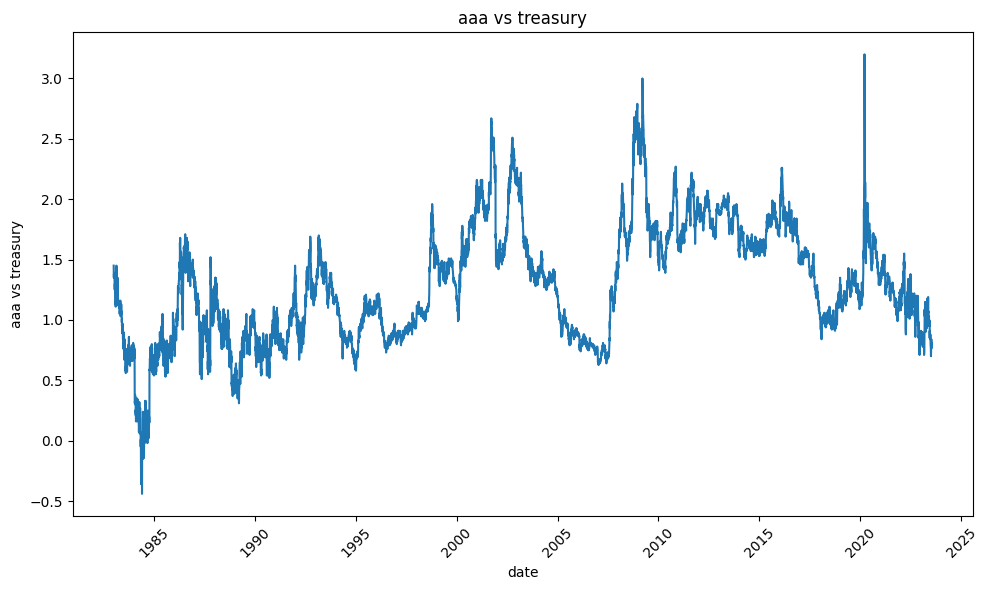

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(aaaCorp_vs_treasury10['Date'], aaaCorp_vs_treasury10['aaaVsTreasury'])
plt.xlabel('date')
plt.ylabel('aaa vs treasury')
plt.title('aaa vs treasury')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
aaaCorp_vs_treasury10.to_csv('data/aaavstreasury.csv', index=False)

## 7.) Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: OECD Indicator for the United States (CSCICP03USM665S)

In [39]:
consumer_confidence_sent = fred.get_series('CSCICP03USM665S')
print(consumer_confidence_sent.head())
print(consumer_confidence_sent.tail())

1960-01-01    101.641974
1960-02-01    101.379140
1960-03-01    101.152075
1960-04-01    101.026822
1960-05-01    101.058444
dtype: float64
2023-01-01    97.303185
2023-02-01    97.442955
2023-03-01    97.332214
2023-04-01    97.155482
2023-05-01    96.877280
dtype: float64


In [40]:
consumer_confidence_sent = consumer_confidence_sent.to_frame().reset_index()
consumer_confidence_sent.rename(columns = {'index': 'Date', 0: 'senti'},
                             inplace = True)
consumer_confidence_sent.dropna(inplace=True)
consumer_confidence_sent

,Date,senti
0,1960-01-01,101.641974
1,1960-02-01,101.379140
2,1960-03-01,101.152075
3,1960-04-01,101.026822
4,1960-05-01,101.058444
...,...,...
756,2023-01-01,97.303185
757,2023-02-01,97.442955
758,2023-03-01,97.332214
759,2023-04-01,97.155482


In [41]:
consumer_confidence_sent.to_csv('data/consumer_confidence_sent.csv', index=False)

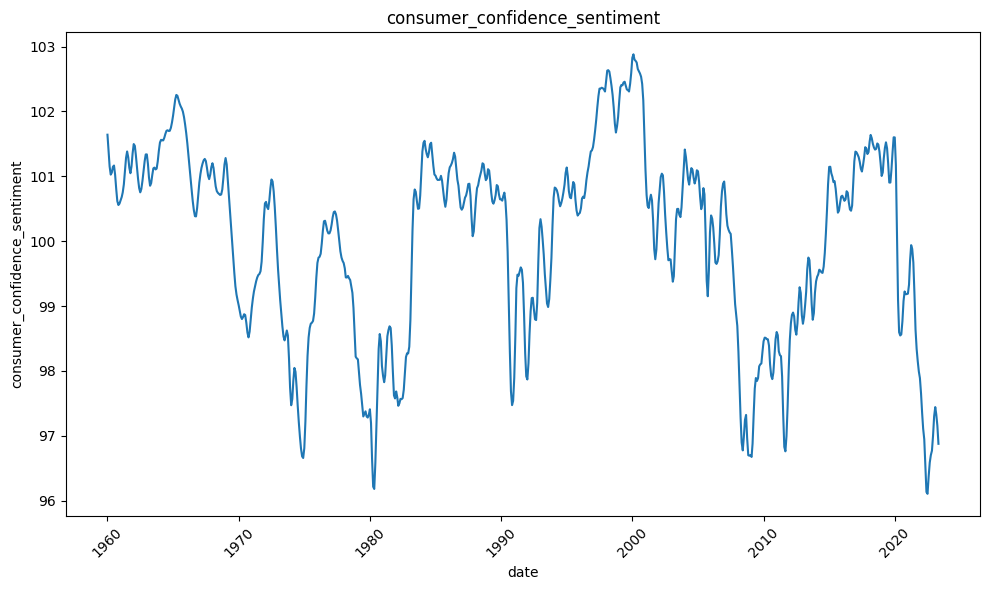

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(consumer_confidence_sent['Date'], consumer_confidence_sent['senti'])
plt.xlabel('date')
plt.ylabel('consumer_confidence_sentiment')
plt.title('consumer_confidence_sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8.) 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity (T10Y3M)

Series is calculated as the spread between 10-Year Treasury Constant Maturity (BC_10YEAR) and 3-Month Treasury Constant Maturity (BC_3MONTH).

In [43]:
t10y3m = fred.get_series('T10Y3M')
print(t10y3m.head())
print(t10y3m.tail())

1982-01-04    2.32
1982-01-05    2.24
1982-01-06    2.43
1982-01-07    2.46
1982-01-08    2.50
dtype: float64
2023-07-17   -1.68
2023-07-18   -1.69
2023-07-19   -1.74
2023-07-20   -1.64
2023-07-21   -1.66
dtype: float64


In [44]:
t10y3m = t10y3m.to_frame().reset_index()
t10y3m.rename(columns = {'index': 'Date', 0: 't10y3m'},
                             inplace = True)
t10y3m.dropna(inplace=True)
t10y3m

,Date,t10y3m
0,1982-01-04,2.32
1,1982-01-05,2.24
2,1982-01-06,2.43
3,1982-01-07,2.46
4,1982-01-08,2.50
...,...,...
10835,2023-07-17,-1.68
10836,2023-07-18,-1.69
10837,2023-07-19,-1.74
10838,2023-07-20,-1.64


In [45]:
t10y3m.to_csv('data/t10y3m.csv', index=False)

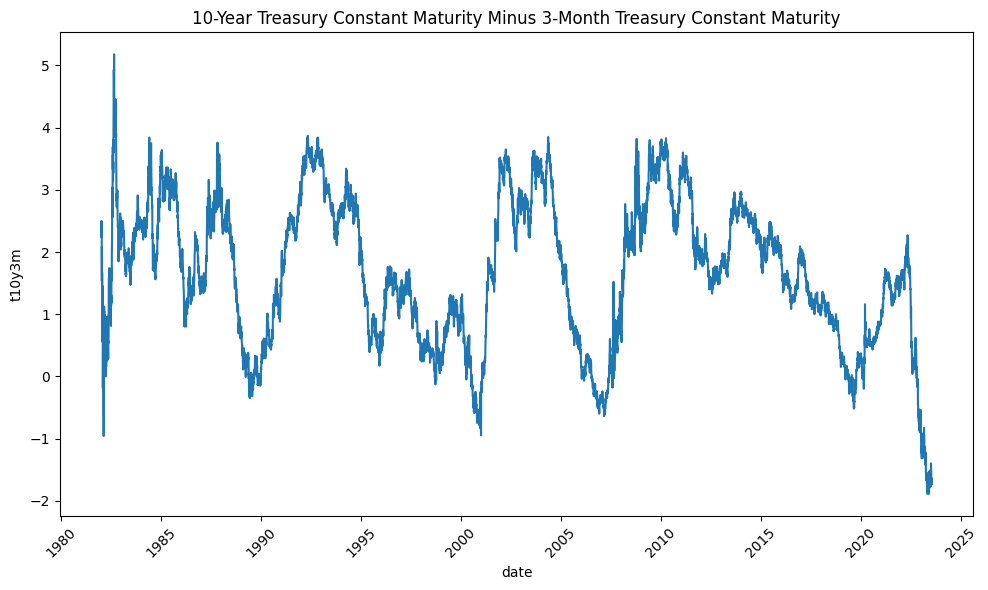

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(t10y3m['Date'], t10y3m['t10y3m'])
plt.xlabel('date')
plt.ylabel('t10y3m')
plt.title('10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9.) CBOE Volatility Index: VIX (VIXCLS)	
VIX measures market expectation of near term volatility conveyed by stock index option prices

In [47]:
vix = fred.get_series('VIXCLS')
print(vix.head())
print(vix.tail())

1990-01-02    17.24
1990-01-03    18.19
1990-01-04    19.22
1990-01-05    20.11
1990-01-08    20.26
dtype: float64
2023-07-17    13.48
2023-07-18    13.30
2023-07-19    13.76
2023-07-20    13.99
2023-07-21    13.60
dtype: float64


In [48]:
vix = vix.to_frame().reset_index()
vix.rename(columns = {'index': 'Date', 0: 'vix'},
                             inplace = True)
vix.dropna(inplace=True)
vix

,Date,vix
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26
...,...,...
8749,2023-07-17,13.48
8750,2023-07-18,13.30
8751,2023-07-19,13.76
8752,2023-07-20,13.99


In [49]:
vix.to_csv('data/vix.csv', index=False)

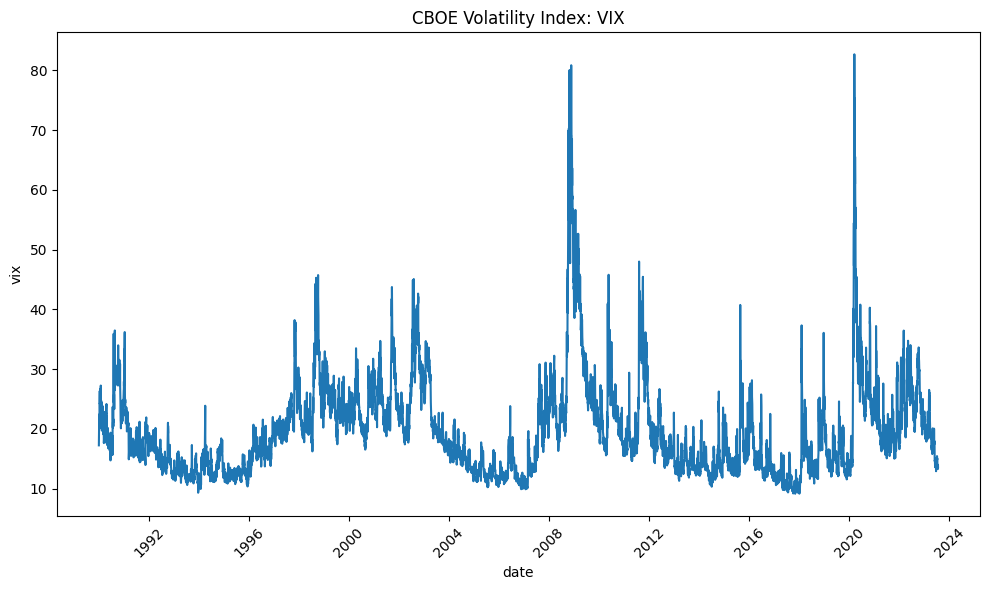

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(vix['Date'], vix['vix'])
plt.xlabel('date')
plt.ylabel('vix')
plt.title('CBOE Volatility Index: VIX')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10.) Business Tendency Surveys for Manufacturing: Confidence Indicators: Composite Indicators: OECD Indicator for the United States (BSCICP03USM665S)	


In [51]:
bus_confidence = fred.get_series('BSCICP03USM665S')
print(bus_confidence.head())
print(bus_confidence.tail())

1955-01-01   NaN
1955-02-01   NaN
1955-03-01   NaN
1955-04-01   NaN
1955-05-01   NaN
dtype: float64
2023-01-01    98.986356
2023-02-01    98.937179
2023-03-01    98.903667
2023-04-01    98.906938
2023-05-01    98.912986
dtype: float64


In [52]:
bus_confidence = bus_confidence.to_frame().reset_index()
bus_confidence.rename(columns = {'index': 'Date', 0: 'bus_confidence'},
                             inplace = True)
bus_confidence.dropna(inplace=True)
bus_confidence

,Date,bus_confidence
60,1960-01-01,100.791957
61,1960-02-01,100.040093
62,1960-03-01,99.063732
63,1960-04-01,98.298624
64,1960-05-01,97.886914
...,...,...
816,2023-01-01,98.986356
817,2023-02-01,98.937179
818,2023-03-01,98.903667
819,2023-04-01,98.906938


In [53]:
bus_confidence.to_csv('data/bus_confidence.csv', index=False)

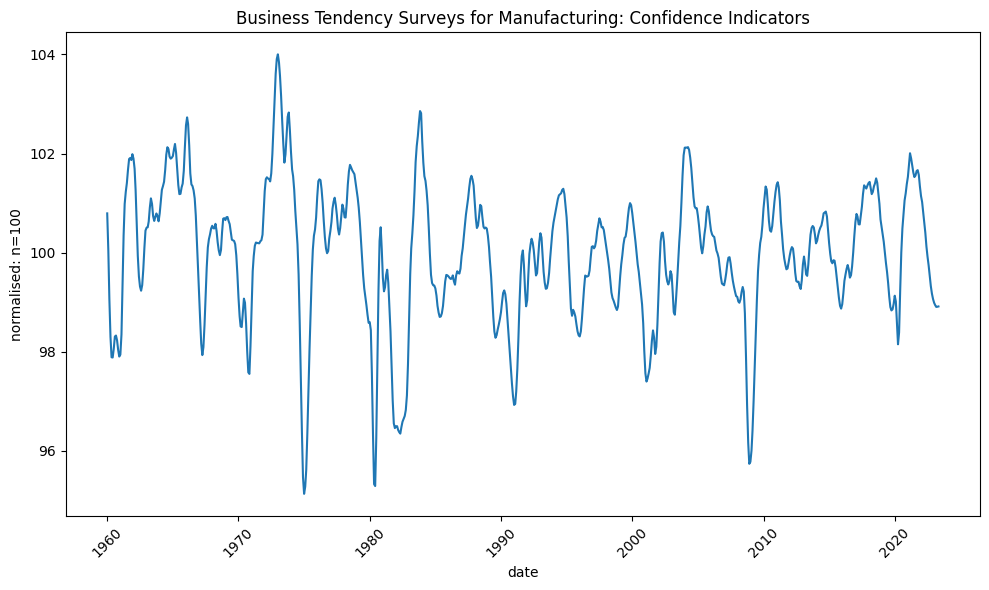

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(bus_confidence['Date'], bus_confidence['bus_confidence'])
plt.xlabel('date')
plt.ylabel('normalised: n=100')
plt.title('Business Tendency Surveys for Manufacturing: Confidence Indicators')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get S&P500 data

In [55]:
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import date

yf.pdr_override() 
today = date.today()

data = pdr.get_data_yahoo("^GSPC", start="1990-01-01", end=today)
data.to_csv('data/spy.csv')

[*********************100%***********************]  1 of 1 completed


In [56]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2023-07-18,4521.779785,4562.299805,4514.589844,4554.979980,4554.979980,4090010000
2023-07-19,4563.870117,4578.430176,4557.479980,4565.720215,4565.720215,4115670000
2023-07-20,4554.379883,4564.740234,4527.560059,4534.870117,4534.870117,3761770000


In [57]:
data = pdr.get_data_yahoo("SPY", start="1990-01-01", end=today)
data.to_csv('data/spy_etf_trust.csv')

[*********************100%***********************]  1 of 1 completed


In [58]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.029375,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.207392,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.260805,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.527840,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.634621,531500
...,...,...,...,...,...,...
2023-07-18,450.500000,454.859985,450.049988,454.190002,454.190002,80744400
2023-07-19,455.010010,456.429993,454.109985,455.200012,455.200012,65891700
2023-07-20,454.170013,455.100006,451.440002,452.179993,452.179993,70591600
